This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [365]:
using LinearAlgebra
using Plots

In [366]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [367]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [368]:
function get_D_angle(D,n)
    angle= rad2deg(acos(D[n,n]))
    return angle
  end

get_D_angle (generic function with 1 method)

In [369]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [370]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-1.1366695493520371 -0.17345727366292019 -1.2566746123960713; 0.5284759033071661 1.0313065233819134 -0.42211531625705; -0.7822968786377659 -0.2005350840156378 -0.17919300341234745], [1.0574875692663404 -1.3934689957447437 0.0; 0.0 1.9226807030993252 0.0; 2.705689811944757e-305 0.0 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-1.5604919490302946 0.004364972023105929 -2.065422995569046; 0.19441411647744122 -1.349778515366359 0.8704267405997321; 0.6795652059153554 -0.009458820927313306 0.5064214151938933], [1.3336838985686639 -0.5013835601384038 0.0; 0.0 1.9998210774214065 0.0; 2.705689811944757e-305 0.0 0.0]), [-0.057487569266340355 0.8346122973406152; -0.5588566984041285 -0.4816082153509744; 0.8272692246352963 -0.2673496587509894], [0.5478298025004377; 0.6750797860662738; 0.49411515857848887;;], [-0.3336838985686639 0.24209658333798767; -0.2592869768004161 -0.9527540840695443; -0.906

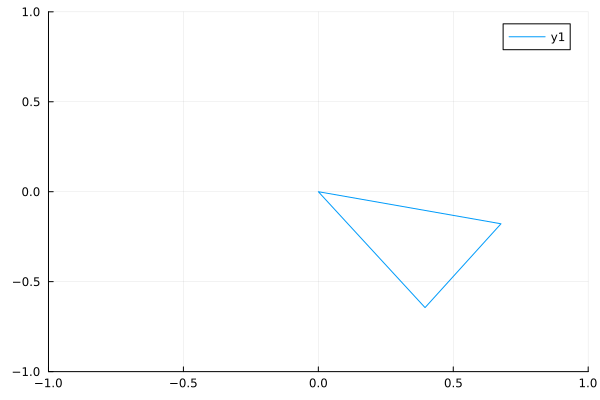

In [371]:
points=draw(E1*U1*V1',n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

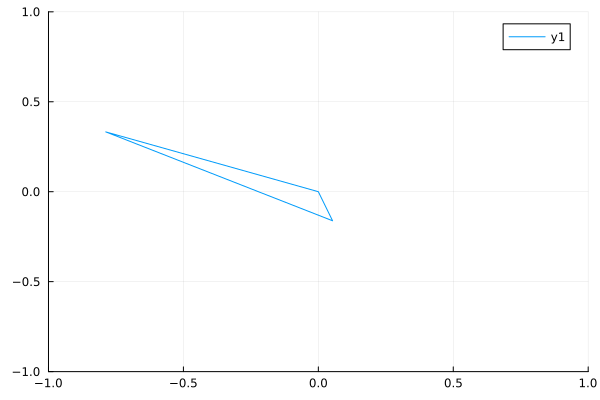

In [372]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

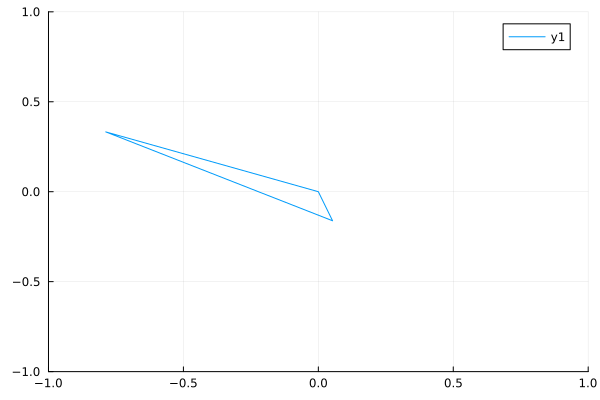

In [373]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

In [374]:
display(get_D_angle(D,n))
display(D)


65.30372087815809

3×3 Matrix{Float64}:
  1.0           0.0       -5.27881e-17
 -1.11022e-16   0.417808   0.908535
 -4.46269e-16  -0.908535   0.417808

[I   0   0\
 0   C   -S\
 0   S    C]

In [375]:

function smooth_transition()
    W, U, U1, U2, V1, V2, D = cs_decomposition(n, E, F, E1, E2, F1, F2)
    max_angle = get_D_angle(D, n)
    if(D[2,3]<0)
        i=1
    else
        i=-1
    end
    anim = @animate for angle in 0:1:max_angle
        D[2,2] = cosd(angle)
        D[2,3] = -i*sind(angle)
        D[3,2] = i*sind(angle)
        D[3,3] = cosd(angle)
        #display(D)
        W = E * U * D * U' * E'
        points = draw(W*E1*U1*V1' , n)
        plot(points[1, :], points[2, :], xlim = [-1, 1], ylim = [-1, 1], legend = true, label = "Angle: $angle")
    end
    gif(anim, "smooth_transition.gif", fps = 10) # Save the animation as a GIF
end

smooth_transition (generic function with 1 method)

┌ Info: Saved animation to d:\Docs matheus\UFRJ\IC\Códigos\CSD-Polygons\smooth_transition.gif
└ @ Plots C:\Users\mathe\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("d:\\Docs matheus\\UFRJ\\IC\\Códigos\\CSD-Polygons\\smooth_transition.gif")
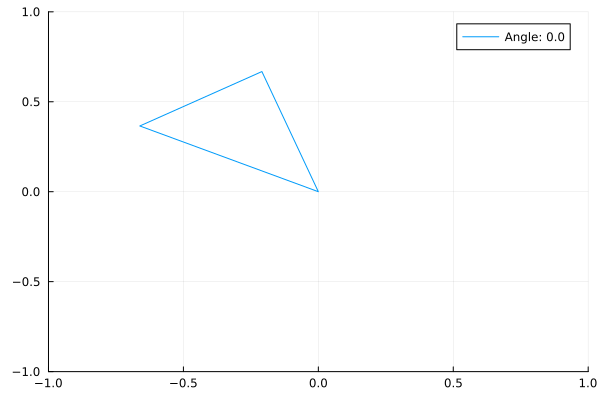

In [376]:
smooth_transition()

In [377]:
rad2deg(acos(0.5))
deg2rad(60)

1.0471975511965976